In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\loren\AppData\Local\Temp\ipykernel_33584\1419958206.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


C:\Users\loren\AppData\Local\Temp\ipykernel_33584\2733214178.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '175.79614325068871' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[(train_data['HeartDisease'] == 1) & (train_data['Cholesterol'] == 0), 'Cholesterol'] = mean_cholesterol_heart_disease_1


Validation Accuracy: 90.70%
Confusion Matrix:


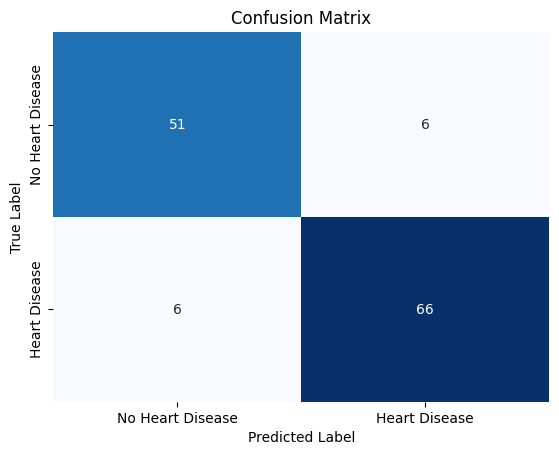

In [2]:
# Load the training data
train_data = pd.read_csv('train_heart.csv')

# Calculate the mean of 'Cholesterol' for people with 'HeartDisease' = 1
mean_cholesterol_heart_disease_1 = train_data[train_data['HeartDisease'] == 1]['Cholesterol'].mean()

# Calculate the mean of 'Cholesterol' for people with 'HeartDisease' = 0
mean_cholesterol_heart_disease_0 = train_data[train_data['HeartDisease'] == 0]['Cholesterol'].mean()

# Replace zeros with the mean for 'Cholesterol' where 'HeartDisease' is 1
train_data.loc[(train_data['HeartDisease'] == 1) & (train_data['Cholesterol'] == 0), 'Cholesterol'] = mean_cholesterol_heart_disease_1

# Replace zeros with the mean for 'Cholesterol' where 'HeartDisease' is 0
train_data.loc[(train_data['HeartDisease'] == 0) & (train_data['Cholesterol'] == 0), 'Cholesterol'] = mean_cholesterol_heart_disease_0

# Encode categorical features using OneHotEncoder
categorical_features = ['Sex', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_features = ['Cholesterol', 'MaxHR', 'Oldpeak']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Separate features and target variable
X = train_data.drop('HeartDisease', axis=1)
y = train_data['HeartDisease']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with the preprocessor and the XGBoost model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', XGBClassifier())])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = pipeline.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f'Validation Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# predictions_df.to_csv('predictions.csv', index=False)